<b>38. Аппроксимировать функцию $x = x(t)$ в пространстве $L^2(-1; 1)$ двумя способами:
    
A. при помощи ортогональной тригонометрической системы;

B. при помощи ортогональных многочленов Лежандра.

Число $n$ - заданный порядок аппроксимации. Построить графики функции $x$ и полученных аппроксимаций. Сравнить точность аппроксимаций в метрике пространства $L^2(-1; 1)$.</b>

a) $x(t) = \frac{1}{\sqrt[3]{1+t}}, n = 8$

<i>A. Тригонометрическая аппроксимация.</i>

Рассмотрим в пространстве $L^2(-1; 1)$ ортонормированный тригонометрический базис:

$$\{\frac{1}{\sqrt{2}}, \sin{\pi t}, \cos{\pi t}, \sin{2\pi t}, \cos{2\pi t}, \dots, \sin{k\pi t}, \cos{k\pi t}, \dots\}$$

In [1]:
import sympy as sp
import scipy.integrate as integrate
from IPython.display import display, Latex

sp.init_printing(use_latex='mathjax')

t = sp.Symbol('t')
# Исходная функция
x = 1/(1+t)**(sp.Rational(1, 3))
n = 8

a0 = (1/sp.sqrt(2))*(sp.integrate(x, (t, -1, 1)))
a = []
b = []

# Высчитаем коэффициенты a и b
for i in range(1, n + 1):
    a.append(integrate.quad(lambda z: x.subs(t, z)*sp.cos(i*sp.pi*z), -1, 1)[0])
    b.append(integrate.quad(lambda z: x.subs(t, z)*sp.sin(i*sp.pi*z), -1, 1)[0])

sum_to_n = 0
for i in range (n):
    sum_to_n += a[i]*sp.cos((i + 1)*sp.pi*t) + b[i]*sp.sin((i + 1)*sp.pi*t)

# Частичная сумму ряда Фурье по этому базису:
trig = a0/sp.sqrt(2) + sum_to_n

Причем, $trig = trig(t)$ - частичная сумма ряда Фурье для функции $x$ по ортонормированному тригонометрическому базису.

Теперь изобразим графики этих функций.

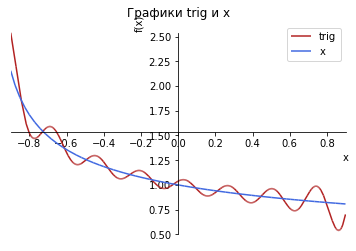

In [2]:
p = sp.plot((trig, (t, -0.9, 0.9)), 
            (x, (t, -0.9, 0.9)),
            title='Графики trig и x',
            show=False,
            legend=True)
p[0].line_color = 'firebrick'
p[0].label = 'trig'
p[1].line_color = 'royalblue'
p[1].label = 'x'
p.show()

<i>B. Аппроксимация многочленами Лежандра.</i>

Рассмотрим в пространстве $L^2(-1; 1)$ ортонормированный базис, составленный из многочленов Лежандра:

$$\{P_0(t), P_1(t), P_2(t), \dots, P_k(t), \dots\}$$

In [3]:
# Найдем первые многочлены Лежандра:
p = [1]

for i in range(1, n + 1):
    p.append(t**i)
    for j in range(i - 1):
        p[i] = p[i] - p[j]*((sp.integrate((t**i)*p[j], (t, -1, 1)))/(sp.integrate(p[j]*p[j], (t, -1, 1))))

display(Latex("Нашли " + str(n) + " первых многочленов Лежандра"))
display(p)

<IPython.core.display.Latex object>

⎡                                2                3                 4      2  
⎢       2   1   3   3⋅t   4   6⋅t    3    5   10⋅t    5⋅t   6   15⋅t    5⋅t   
⎢1, t, t  - ─, t  - ───, t  - ──── + ──, t  - ───── + ───, t  - ───── + ──── -
⎣           3        5         7     35         9      21         11     11   

               5        3                  6       4       2       ⎤
  5    7   21⋅t    105⋅t    35⋅t   8   28⋅t    14⋅t    28⋅t     7  ⎥
 ───, t  - ───── + ────── - ────, t  - ───── + ───── - ───── + ────⎥
 231         13     143     429          15      13     143    1287⎦

In [4]:
# Найдем частичную сумму ряда Фурье по этому базису
leg = 0

for i in range(0, n + 1):
    if i == 0:
        leg += integrate.quad(lambda z: x.subs(t, z)*p[i], -1, 1)[0]*p[i]
    else:
        leg += integrate.quad(lambda z: x.subs(t, z)*p[i].subs(t, z), -1, 1)[0]*p[i]

Причем, $leg = leg(t)$ - частичная сумма ряда Фурье для функции $x$ по ортонормированному базису, составленному из многочленов Лежандра.

Теперь изобразим графики этих функций.

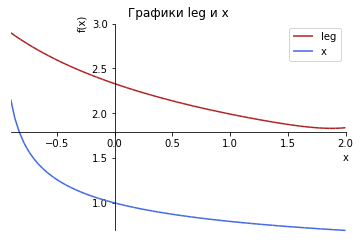

In [5]:
p = sp.plot((leg, (t, -0.9, 2)), 
            (x, (t, -0.9, 2)),
            title='Графики leg и x',
            show=False,
            legend=True)
p[0].line_color = 'firebrick'
p[0].label = 'leg'
p[1].line_color = 'royalblue'
p[1].label = 'x'
p.show()

По графикам можно предположить, что в данном случае тригонометрическая аппроксимация точнее, чем аппроксимация многочленами Лежандра.

Вычислим расстояния между функцией и частичными суммами непосредственным образом.

In [6]:
def diff(x, y):
    return sp.sqrt(integrate.quad(lambda z: (sp.N((x - y)**2)).subs(t, z), -1, 1)[0])

display(Latex("Найдем $||x - trig||$:"))
display(diff(x, trig))

display(Latex("Найдем $||x - leg||$:"))
display(diff(x, leg))

<IPython.core.display.Latex object>

0.702569010089063

<IPython.core.display.Latex object>

1.85008006202380

Действительно, тригонометрическая система дает более точную аппроксимацию функции $x$ в пространстве $L^2(-1; 1)$.